# Using Cardiac Factors To Predict Whether Individuals Will Experience Heart Failure
#### Harsh A, Kyle M, Daniel L, Catarina A 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [62]:
set.seed(50)
#loading raw dataset with new clean column names
heart_raw <- read_csv("https://raw.githubusercontent.com/hamin2006/Group_Project_7/main/data/heart1.csv",  
                       skip = 1, 
                       col_names = c("age","sex","chest_pain","resting_bp","cholesterol","fasting_bs","rest_ecg",
                                    "max_heart_rate","excercise_angina","old_peak","st_slope","heart_failure")) 

#cleaning data and selecting predictor variables
heart_data <- heart_raw |>
    mutate(heart_failure = case_when(heart_failure == 0 ~ "Healthy" , heart_failure == 1 ~ "Failed"), 
           heart_failure = as_factor(heart_failure)) |> 
    select(age, resting_bp, cholesterol, max_heart_rate, heart_failure) 

#splitting clean data into training and testing sets
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_failure)

heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

#summarization of training data
heart_training_summary <- heart_training |>
    group_by(heart_failure) |>
    summarize (patients = n(),
              mean_age = mean(age),
              mean_resting_bp = mean(resting_bp),
              mean_cholesterol = mean(cholesterol),
              mean_max_heart_rate = mean(max_heart_rate),
              missing_data = sum(is.na(heart_failure)) + sum(is.na(age)) + sum(is.na(resting_bp)) + sum(is.na(cholesterol)) + sum(is.na(max_heart_rate)))
heart_training_summary

Rows: 746 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sex, chest_pain, rest_ecg, excercise_angina, st_slope
dbl (7): age, resting_bp, cholesterol, fasting_bs, max_heart_rate, old_peak,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


heart_failure,patients,mean_age,mean_resting_bp,mean_cholesterol,mean_max_heart_rate,missing_data
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Healthy,292,50.08904,129.4075,237.1781,148.5651,0
Failed,267,55.56180,135.9251,250.3446,130.1086,0


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


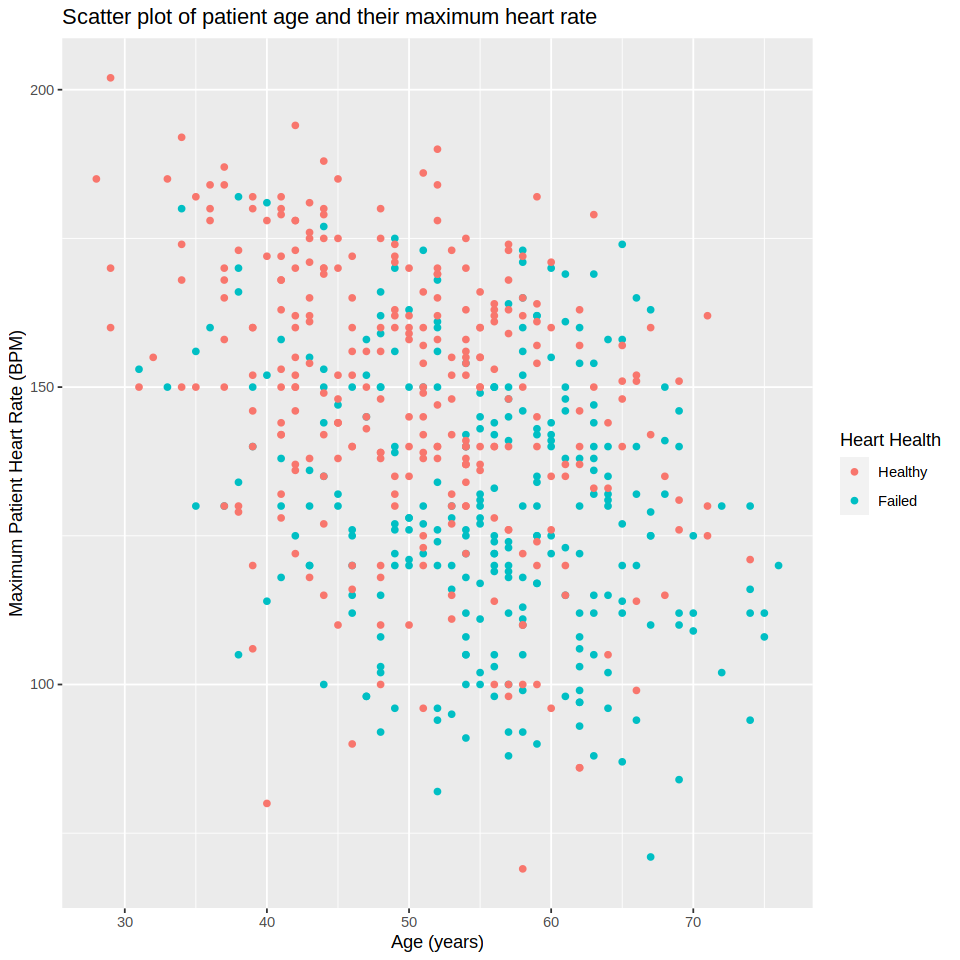

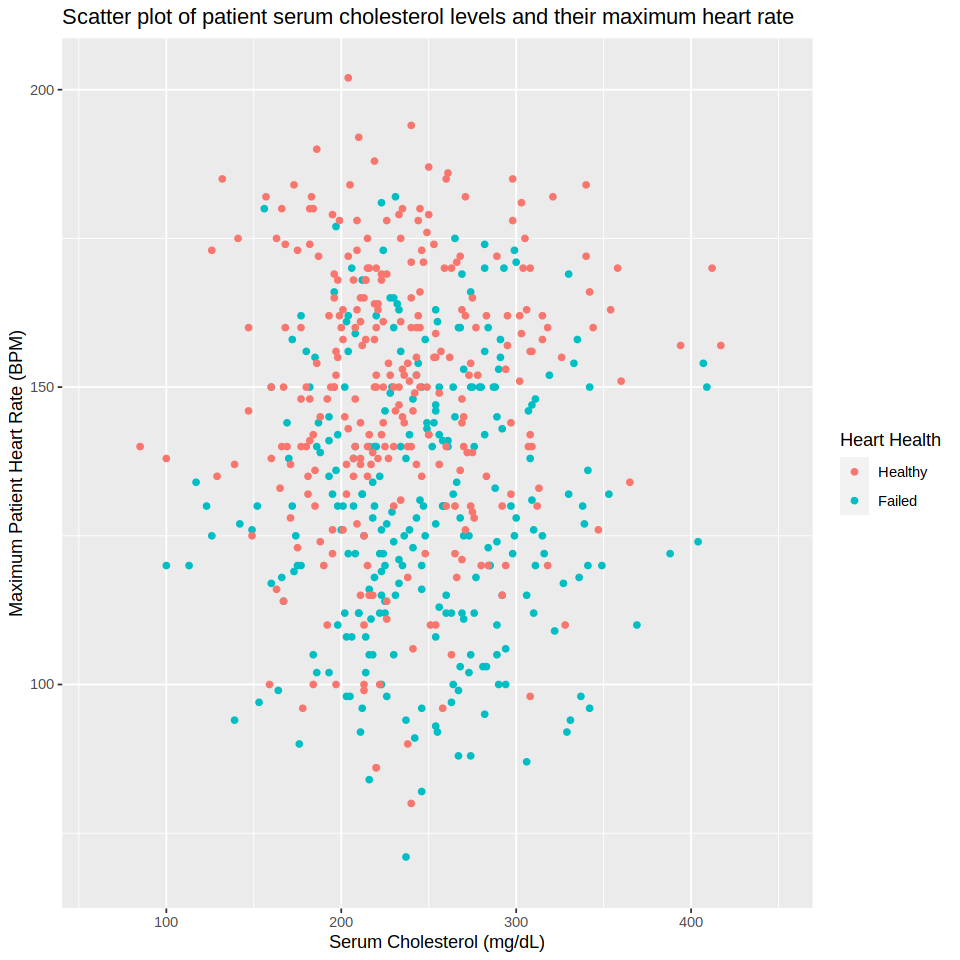

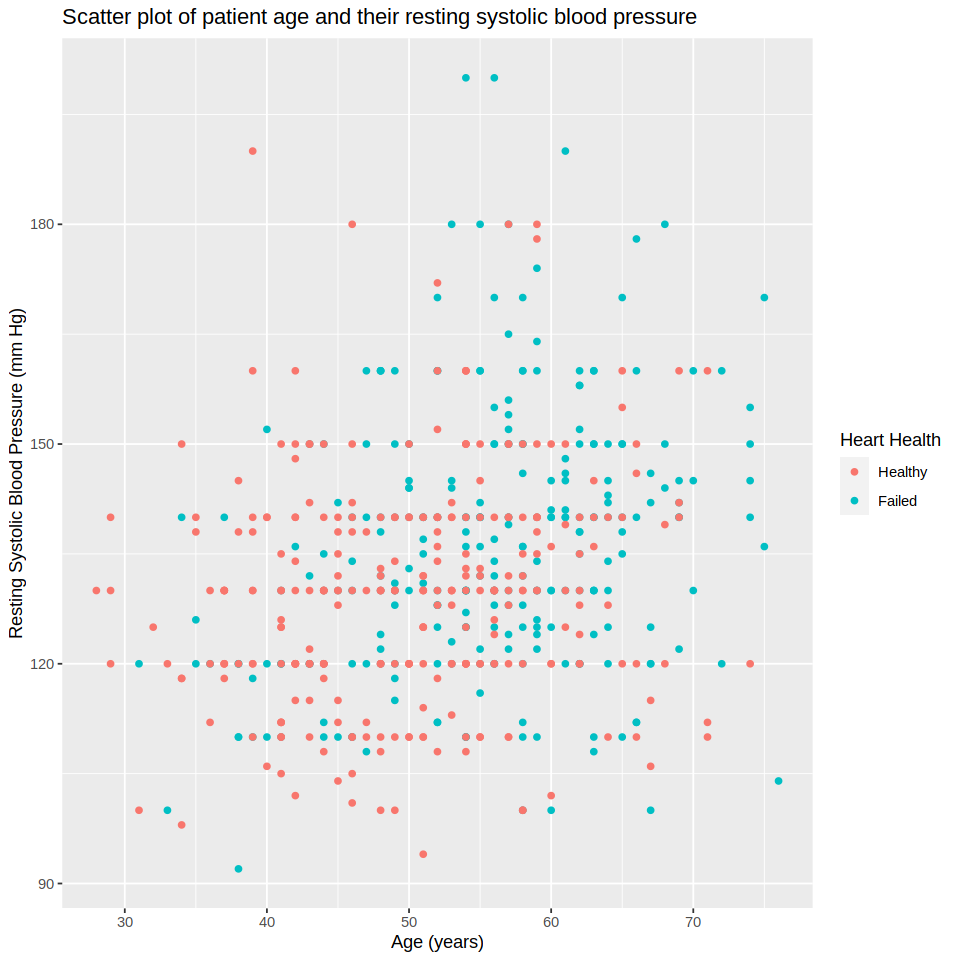

In [69]:
options(repr.plot.height = 8, repr.plot.width = 8)
plot1 <- ggplot(heart_training, aes(x = age, y = resting_bp, colour = heart_failure)) +
                geom_point() +
                labs(x = "Age (years)", y = "Resting Systolic Blood Pressure (mm Hg)", 
                     colour = "Heart Health",
                     title = "Scatter plot of patient age and their resting systolic blood pressure")

plot2 <- ggplot(heart_training, aes(x = age, y = max_heart_rate, colour = heart_failure)) +
                geom_point() +
                labs(x = "Age (years)", y = "Maximum Patient Heart Rate (BPM)", 
                     colour = "Heart Health",
                     title = "Scatter plot of patient age and their maximum heart rate")

plot3 <- ggplot(heart_training, aes(x = cholesterol, y = max_heart_rate, colour = heart_failure)) +
                geom_point() +
                labs(x = "Serum Cholesterol (mg/dL)", y = "Maximum Patient Heart Rate (BPM)",
                     colour = "Heart Health",
                     title = "Scatter plot of patient serum cholesterol levels and their maximum heart rate") +
                xlim(c(60,450))

plot2
plot3
plot1